In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)


In [4]:
df = pd.read_csv('C:\\Users\\Астемир\\Desktop\\ML\\Courses\\coursera\\week4\\food.txt', sep = " ")

In [6]:
df.head()

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7


In [7]:
X = df.iloc[:,1:].values
X = (X - X.mean(axis=0))/(X.std())

In [8]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

In [10]:
Z = linkage(X, method = "average", metric = "euclidean")
Z

array([[0.00000000e+00, 1.00000000e+01, 1.05430290e-03, 2.00000000e+00],
       [1.10000000e+01, 2.70000000e+01, 1.49287090e-02, 3.00000000e+00],
       [6.00000000e+00, 2.50000000e+01, 5.28099470e-02, 2.00000000e+00],
       [1.30000000e+01, 2.00000000e+01, 6.07940709e-02, 2.00000000e+00],
       [4.00000000e+00, 1.40000000e+01, 1.01125182e-01, 2.00000000e+00],
       [1.50000000e+01, 1.90000000e+01, 1.23407494e-01, 2.00000000e+00],
       [2.20000000e+01, 3.00000000e+01, 1.24920143e-01, 3.00000000e+00],
       [7.00000000e+00, 2.90000000e+01, 1.29676610e-01, 3.00000000e+00],
       [1.20000000e+01, 2.80000000e+01, 1.59434422e-01, 4.00000000e+00],
       [3.10000000e+01, 3.40000000e+01, 1.85747552e-01, 5.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 2.13482670e-01, 2.00000000e+00],
       [5.00000000e+00, 3.20000000e+01, 2.53196771e-01, 3.00000000e+00],
       [1.60000000e+01, 1.70000000e+01, 2.80008242e-01, 2.00000000e+00],
       [3.30000000e+01, 3.60000000e+01, 3.07469146e

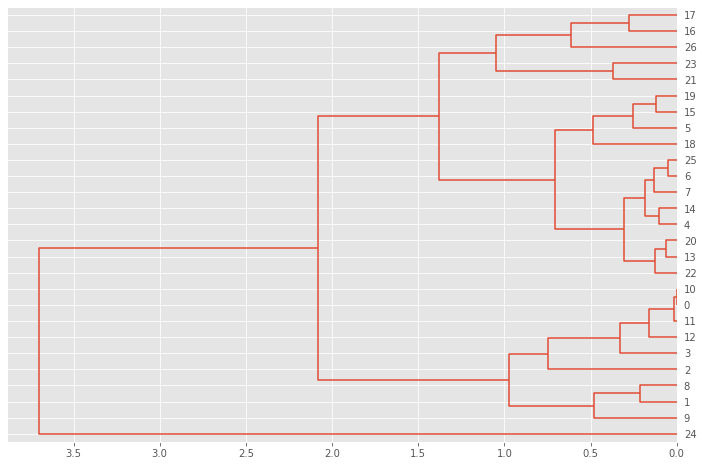

In [22]:
dend = dendrogram(Z, orientation = 'left', color_threshold = 0.0)

In [25]:
label = fcluster(Z, 1.2,criterion = 'distance')
np.unique(label)

array([1, 2, 3, 4], dtype=int32)

In [26]:
df.loc[:,'label'] = label

In [27]:
for i,group in df.groupby("label"):
    print("=", 10)
    print('cluster {}'.format(i))
    print(group)

= 10
cluster 1
                   Name  Energy  Protein  Fat  Calcium  Iron  label
0          Braised beef     340       20   28        9   2.6      1
1             Hamburger     245       21   17        9   2.7      1
2            Roast beef     420       15   39        7   2.0      1
3             Beefsteak     375       19   32        9   2.6      1
8        Roast lamb leg     265       20   20        9   2.6      1
9   Roast lamb shoulder     300       18   25        9   2.3      1
10           Smoked ham     340       20   28        9   2.5      1
11           Pork roast     340       19   29        9   2.5      1
12        Pork simmered     355       19   30        9   2.4      1
= 10
cluster 2
                Name  Energy  Protein  Fat  Calcium  Iron  label
4        Canned beef     180       22   10       17   3.7      2
5    Broiled chicken     115       20    3        8   1.4      2
6     Canned chicken     170       25    7       12   1.5      2
7         Beef heart     160  